# Parameter Source Tracking: From Data to Parameter to Recommendation

This notebook demonstrates the **flow from data to parameter to recommendation** and why tracking parameter sources matters.

Understanding this is essential because:
- Parameters come from data through a process
- Each step in the process can introduce errors
- Tracking sources helps assess parameter reliability
- Understanding the flow helps identify where errors can enter


## Key Concepts

**The Flow**:
- Raw Data → Data Cleaning → Analysis → Parameter Value → Model → Recommendation
- Each step can introduce errors
- Errors at any step become errors in recommendations

**Parameter Sources**:
- Historical data: Past performance
- Forecasts: Future predictions
- Expert estimates: Professional judgment
- Assumptions: Best guesses

**Tracking Sources**:
- Know where each parameter comes from
- Understand the process that created it
- Assess reliability based on source
- Identify where errors might enter

**Critical insight**: Track parameter sources to understand reliability and identify where errors can enter the system.


## Scenario: Staffing Model Parameters

You're building a staffing model. Each parameter comes from a different source through a different process.

**Parameters needed:**
- Average service time (from time logs)
- Customer arrival rate (from forecast)
- Hourly cost (from payroll)
- Minimum staffing (from policy)

**Question**: Where did each parameter come from? How reliable is each one?


## Step 1: Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Step 2: Track Parameter Sources

Let's create a parameter source tracking document:


In [2]:
# Parameter source tracking
parameter_tracking = pd.DataFrame({
    'Parameter': ['Avg Service Time', 'Arrival Rate', 'Hourly Cost', 'Min Staffing'],
    'Value': [5.0, 10.0, 25.0, 2],
    'Source': ['Time Logs', 'Forecast', 'Payroll', 'Policy'],
    'Process': [
        'Raw logs → Clean → Calculate avg',
        'Historical data → Forecast model → Prediction',
        'Payroll records → Direct',
        'Company policy → Direct'
    ],
    'Trust Level': ['Medium', 'Low', 'High', 'High'],
    'Potential Errors': [
        'Incomplete logs, cleaning errors',
        'Forecast uncertainty',
        'Minimal (direct from records)',
        'Minimal (policy document)'
    ]
})

print("PARAMETER SOURCE TRACKING:\n")
print(parameter_tracking.to_string(index=False))

print("\n\nKEY INSIGHT:")
print("  Each parameter has a different source and process")
print("  Understanding sources helps assess reliability")
print("  Tracking helps identify where errors can enter")


PARAMETER SOURCE TRACKING:

       Parameter  Value    Source                                       Process Trust Level                 Potential Errors
Avg Service Time    5.0 Time Logs              Raw logs → Clean → Calculate avg      Medium Incomplete logs, cleaning errors
    Arrival Rate   10.0  Forecast Historical data → Forecast model → Prediction         Low             Forecast uncertainty
     Hourly Cost   25.0   Payroll                      Payroll records → Direct        High    Minimal (direct from records)
    Min Staffing    2.0    Policy                       Company policy → Direct        High        Minimal (policy document)


KEY INSIGHT:
  Each parameter has a different source and process
  Understanding sources helps assess reliability
  Tracking helps identify where errors can enter


## Step 3: Visualize the Flow

Let's visualize the flow from data to recommendation:


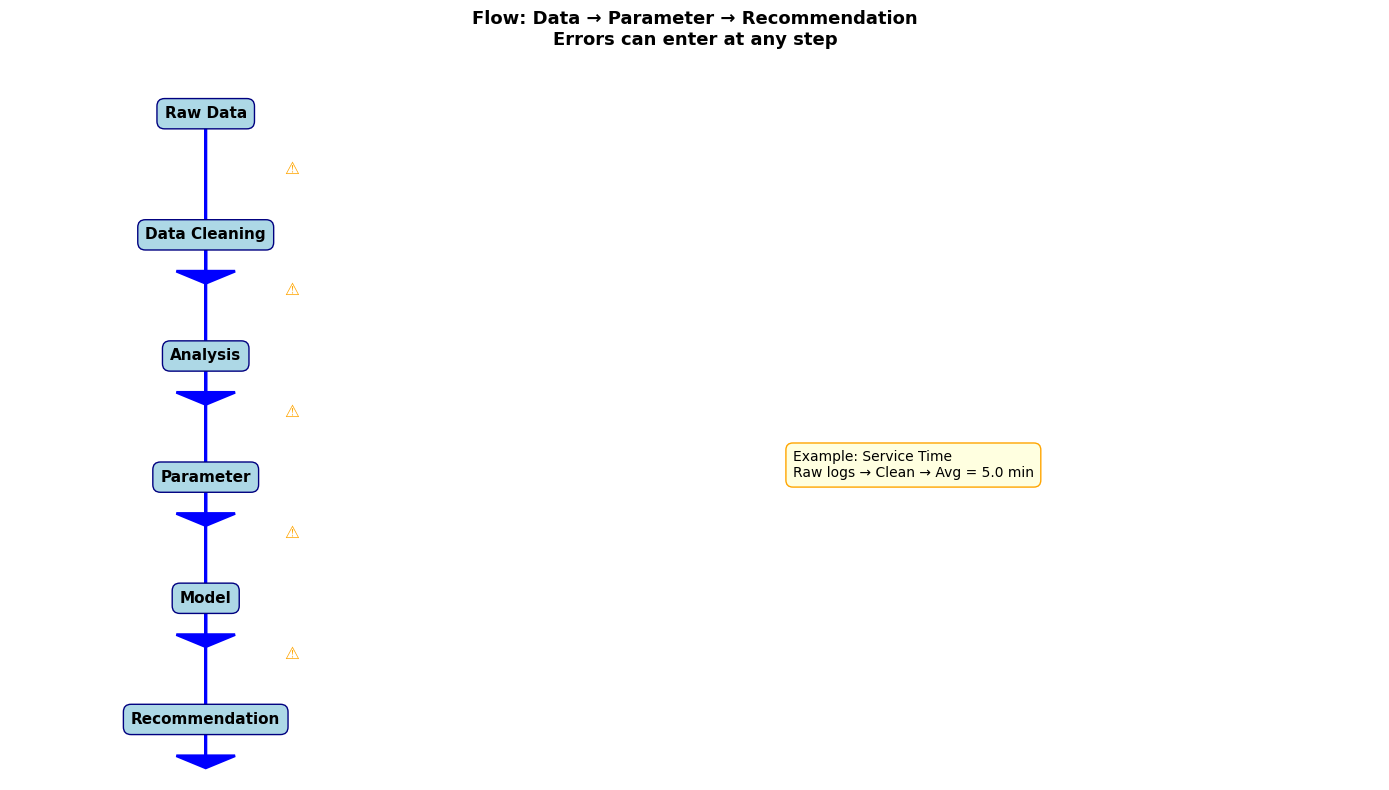


KEY INSIGHT:
  Errors can enter at any step in the process
  Understanding the flow helps identify where errors might occur
  Validate each step to prevent errors from propagating


In [3]:
# Visualize the flow
fig, ax = plt.subplots(figsize=(14, 8))

# Flow stages
stages = ['Raw Data', 'Data Cleaning', 'Analysis', 'Parameter', 'Model', 'Recommendation']
y_positions = [6, 5, 4, 3, 2, 1]

# Draw flow
for i in range(len(stages) - 1):
    ax.arrow(0, y_positions[i], 0, y_positions[i+1] - y_positions[i] - 0.3, 
             head_width=0.15, head_length=0.1, fc='blue', ec='blue', linewidth=2)
    # Add warning symbol
    ax.text(0.2, (y_positions[i] + y_positions[i+1])/2, '⚠', fontsize=12, color='orange')

# Add stage boxes
for stage, y in zip(stages, y_positions):
    ax.text(0, y, stage, ha='center', va='center', 
            bbox=dict(boxstyle='round,pad=0.5', facecolor='lightblue', edgecolor='navy'),
            fontsize=11, fontweight='bold')

# Add example for one parameter
ax.text(1.5, 3, 'Example: Service Time\nRaw logs → Clean → Avg = 5.0 min', 
        bbox=dict(boxstyle='round,pad=0.5', facecolor='lightyellow', edgecolor='orange'),
        fontsize=10)

ax.set_xlim(-0.5, 3)
ax.set_ylim(0.5, 6.5)
ax.set_title('Flow: Data → Parameter → Recommendation\nErrors can enter at any step', 
             fontsize=13, fontweight='bold')
ax.axis('off')

plt.tight_layout()
plt.show()

print("\nKEY INSIGHT:")
print("  Errors can enter at any step in the process")
print("  Understanding the flow helps identify where errors might occur")
print("  Validate each step to prevent errors from propagating")


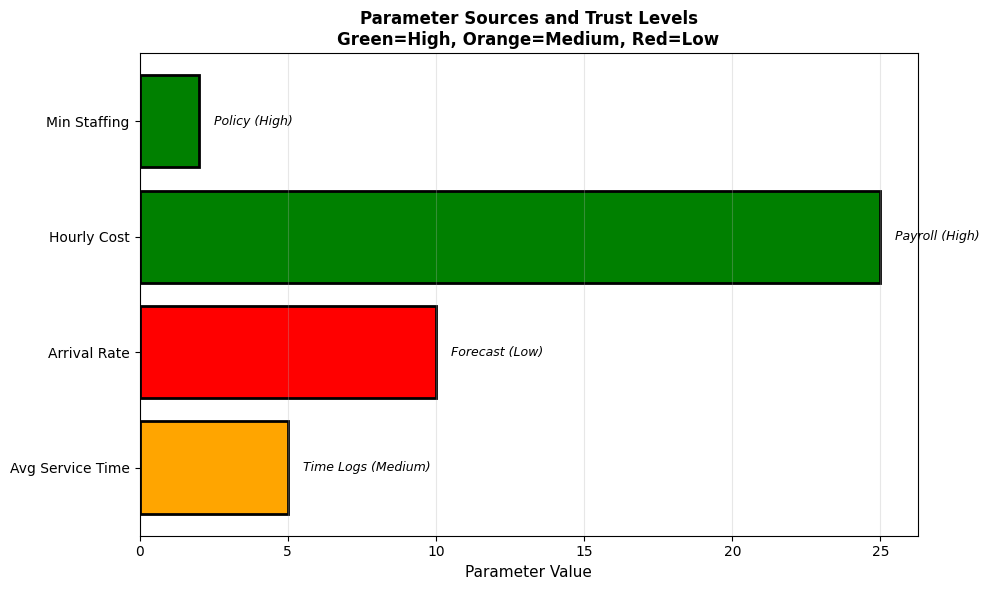


KEY INSIGHT:
  Parameter sources determine trust levels
  High trust sources (payroll, policy) → High confidence
  Low trust sources (forecasts) → Low confidence
  Track sources to assess recommendation reliability


In [4]:
# Visualize trust levels
fig, ax = plt.subplots(figsize=(10, 6))

trust_colors = {'High': 'green', 'Medium': 'orange', 'Low': 'red'}
colors = [trust_colors.get(level, 'gray') for level in parameter_tracking['Trust Level']]

bars = ax.barh(parameter_tracking['Parameter'], parameter_tracking['Value'], 
               color=colors, edgecolor='black', linewidth=2)
ax.set_xlabel('Parameter Value', fontsize=11)
ax.set_title('Parameter Sources and Trust Levels\nGreen=High, Orange=Medium, Red=Low', 
             fontsize=12, fontweight='bold')
ax.grid(axis='x', alpha=0.3)

# Add source labels
for i, (bar, source, trust) in enumerate(zip(bars, parameter_tracking['Source'], 
                                             parameter_tracking['Trust Level'])):
    ax.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, 
            f"{source} ({trust})", va='center', fontsize=9, style='italic')

plt.tight_layout()
plt.show()

print("\nKEY INSIGHT:")
print("  Parameter sources determine trust levels")
print("  High trust sources (payroll, policy) → High confidence")
print("  Low trust sources (forecasts) → Low confidence")
print("  Track sources to assess recommendation reliability")


## Summary: Parameter Source Tracking

**Key Takeaways:**

1. **Parameters come from a process**
   - Raw Data → Data Cleaning → Analysis → Parameter
   - Each step can introduce errors
   - Understanding the flow helps identify where errors can enter

2. **Track parameter sources**
   - Know where each parameter comes from
   - Understand the process that created it
   - Document sources for transparency

3. **Sources determine trust levels**
   - Historical data: Generally more trustworthy
   - Forecasts: Medium trust (uncertainty)
   - Expert estimates: Lower trust
   - Assumptions: Lowest trust

4. **Practical implications**
   - Document parameter sources
   - Understand the process for each parameter
   - Validate each step in the process
   - Assess trust levels based on sources

**Remember**: Track parameter sources to understand reliability and identify where errors can enter the system!
